# Imports

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso , Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
plt.style.use('seaborn')

# Dataset

In [2]:
df = pd.read_csv('captor17013-sensor1.csv',parse_dates=["date"],index_col='date')
for i in range(len(df.Sensor_O3)):
    if str(df.Sensor_O3[i])[1]=='.':
        df.Sensor_O3[i]=float(str(df.Sensor_O3[i])[0]+ str(df.Sensor_O3[i])[2:])
df.Sensor_O3 = df.Sensor_O3.values.astype('float')

<ipython-input-2-72e3029171c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sensor_O3[i]=float(str(df.Sensor_O3[i])[0]+ str(df.Sensor_O3[i])[2:])


In [5]:
df.head()

,RefSt,Sensor_O3,Temp,RelHum
date,,,,
2017-05-16 00:00:00,22.0,509.983,15.00,63.70
2017-05-16 00:30:00,18.0,446.033,14.67,61.63
2017-05-16 01:30:00,8.0,445.594,13.88,67.12
2017-05-16 02:00:00,16.0,408.997,13.40,68.40
2017-05-16 02:30:00,11.0,420.210,13.37,68.57


In [3]:
gaz = pd.read_csv('NO_Manlleu.csv',parse_dates=["date"],index_col='date')
gaz["Sensor_NO2"] = pd.read_csv('NO2_Manlleu.csv',parse_dates=["date"],index_col='date').Sensor_NO2
gaz["Sensor_PM10"] = pd.read_csv('PM10_Manlleu.csv',parse_dates=["date"],index_col='date').Sensor_PM10
gaz["Sensor_SO2"] = pd.read_csv('SO2_Manlleu.csv',parse_dates=["date"],index_col='date').Sensor_SO2
gaz.head()

,Sensor_NO,Sensor_NO2,Sensor_PM10,Sensor_SO2
date,,,,
2017-06-17 00:00:00,2.0,43.0,51.0,4.0
2017-06-17 01:00:00,3.0,31.0,39.0,2.0
2017-06-17 02:00:00,2.0,28.0,34.0,1.0
2017-06-17 03:00:00,2.0,25.0,31.0,1.0
2017-06-17 04:00:00,3.0,23.0,28.0,1.0


# Partie I

## Question 1

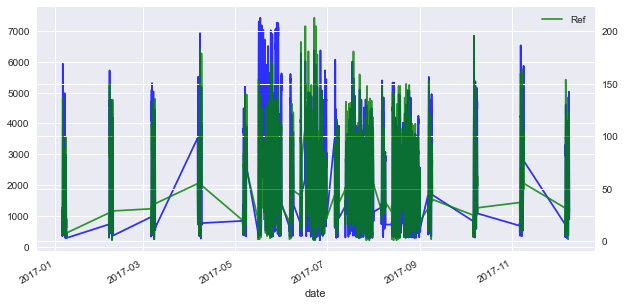

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes',1))
df.Sensor_O3.plot(ax=ax, style='b-',label='Raw',alpha=0.8)
df.RefSt.plot(ax=ax2, style='g-',label='Ref',alpha=0.8)
plt.legend()

## Question 2

Before Normalization we have : 

<AxesSubplot:xlabel='Sensor_O3', ylabel='RefSt'>

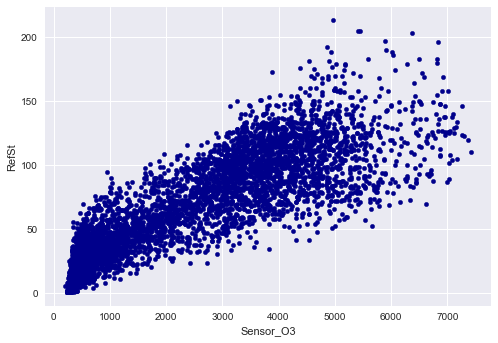

In [5]:
df.plot.scatter(x='Sensor_O3',y='RefSt',c='DarkBlue')

After Normalization we have : 

In [6]:
ref_mean , ref_std = df.RefSt.mean() , df.RefSt.std()
raw_mean , raw_std = df.Sensor_O3.mean() , df.Sensor_O3.std()
df["Sensor_O3_n"] = df["Sensor_O3"].apply(lambda x : (x-raw_mean)/raw_std)
df["RefSt_n"] = df["RefSt"].apply(lambda x : (x-ref_mean)/ref_std)

<AxesSubplot:xlabel='Sensor_O3_n', ylabel='RefSt_n'>

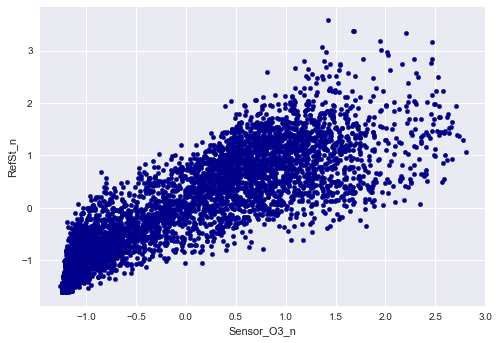

In [7]:
df.plot.scatter(x='Sensor_O3_n',y='RefSt_n',c='DarkBlue')

## Question 3

array([[<AxesSubplot:xlabel='Sensor_O3_n', ylabel='Sensor_O3_n'>,
        <AxesSubplot:xlabel='RefSt_n', ylabel='Sensor_O3_n'>,
        <AxesSubplot:xlabel='Temp_n', ylabel='Sensor_O3_n'>,
        <AxesSubplot:xlabel='RelHum_n', ylabel='Sensor_O3_n'>],
       [<AxesSubplot:xlabel='Sensor_O3_n', ylabel='RefSt_n'>,
        <AxesSubplot:xlabel='RefSt_n', ylabel='RefSt_n'>,
        <AxesSubplot:xlabel='Temp_n', ylabel='RefSt_n'>,
        <AxesSubplot:xlabel='RelHum_n', ylabel='RefSt_n'>],
       [<AxesSubplot:xlabel='Sensor_O3_n', ylabel='Temp_n'>,
        <AxesSubplot:xlabel='RefSt_n', ylabel='Temp_n'>,
        <AxesSubplot:xlabel='Temp_n', ylabel='Temp_n'>,
        <AxesSubplot:xlabel='RelHum_n', ylabel='Temp_n'>],
       [<AxesSubplot:xlabel='Sensor_O3_n', ylabel='RelHum_n'>,
        <AxesSubplot:xlabel='RefSt_n', ylabel='RelHum_n'>,
        <AxesSubplot:xlabel='Temp_n', ylabel='RelHum_n'>,
        <AxesSubplot:xlabel='RelHum_n', ylabel='RelHum_n'>]], dtype=object)

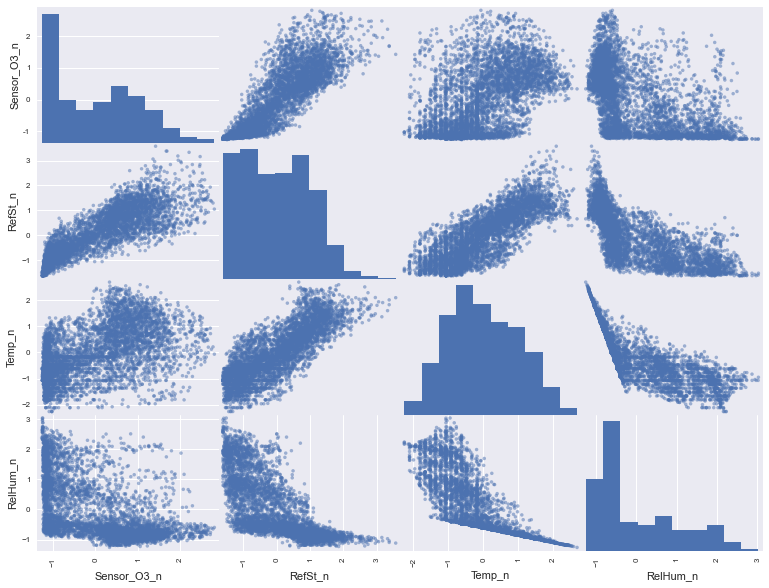

In [8]:
df["Temp_n"] = df["Temp"].apply(lambda x : (x-df["Temp"].mean())/df["Temp"].std())
df["RelHum_n"] = df["RelHum"].apply(lambda x : (x-df["RelHum"].mean())/df["RelHum"].std())
pd.plotting.scatter_matrix(df.drop(columns=["RefSt","Sensor_O3","Temp","RelHum"]),figsize=(13,10))

In [9]:
df2 = df.loc['2017-06-17':'2017-08-31'][["RefSt","Sensor_O3"]].resample('h').mean()
df2["RefSt_n"] = df2["RefSt"].apply(lambda x : (x-df2["RefSt"].mean())/df2["RefSt"].std())
df2["Sensor_O3_n"] = df2["Sensor_O3"].apply(lambda x : (x-df2["Sensor_O3"].mean())/df2["Sensor_O3"].std())
df2["Sensor_NO_n"] = gaz["Sensor_NO"].apply(lambda x : (x-gaz["Sensor_NO"].mean())/gaz["Sensor_NO"].std())
df2["Sensor_NO2_n"] = gaz["Sensor_NO2"].apply(lambda x : (x-gaz["Sensor_NO2"].mean())/gaz["Sensor_NO2"].std())
df2["Sensor_PM10_n"] = gaz["Sensor_PM10"].apply(lambda x : (x-gaz["Sensor_PM10"].mean())/gaz["Sensor_PM10"].std())
df2["Sensor_SO2_n"] = gaz["Sensor_SO2"].apply(lambda x : (x-gaz["Sensor_SO2"].mean())/gaz["Sensor_SO2"].std())
df2 = df2.drop(columns=["RefSt","Sensor_O3"])
df2.head()

,RefSt_n,Sensor_O3_n,Sensor_NO_n,Sensor_NO2_n,Sensor_PM10_n,Sensor_SO2_n
date,,,,,,
2017-06-17 00:00:00,-0.809293,-1.063922,-0.066566,4.534732,2.107689,1.110771
2017-06-17 01:00:00,-0.948705,-1.111929,0.362307,2.820470,1.130583,0.038150
2017-06-17 02:00:00,-1.113465,-1.133645,-0.066566,2.391905,0.723455,-0.498160
2017-06-17 03:00:00,-1.126139,-1.125620,-0.066566,1.963340,0.479178,-0.498160
2017-06-17 04:00:00,-1.202182,-1.157261,0.362307,1.677629,0.234902,-0.498160


array([[<AxesSubplot:xlabel='RefSt_n', ylabel='RefSt_n'>,
        <AxesSubplot:xlabel='Sensor_O3_n', ylabel='RefSt_n'>,
        <AxesSubplot:xlabel='Sensor_NO_n', ylabel='RefSt_n'>,
        <AxesSubplot:xlabel='Sensor_NO2_n', ylabel='RefSt_n'>,
        <AxesSubplot:xlabel='Sensor_PM10_n', ylabel='RefSt_n'>,
        <AxesSubplot:xlabel='Sensor_SO2_n', ylabel='RefSt_n'>],
       [<AxesSubplot:xlabel='RefSt_n', ylabel='Sensor_O3_n'>,
        <AxesSubplot:xlabel='Sensor_O3_n', ylabel='Sensor_O3_n'>,
        <AxesSubplot:xlabel='Sensor_NO_n', ylabel='Sensor_O3_n'>,
        <AxesSubplot:xlabel='Sensor_NO2_n', ylabel='Sensor_O3_n'>,
        <AxesSubplot:xlabel='Sensor_PM10_n', ylabel='Sensor_O3_n'>,
        <AxesSubplot:xlabel='Sensor_SO2_n', ylabel='Sensor_O3_n'>],
       [<AxesSubplot:xlabel='RefSt_n', ylabel='Sensor_NO_n'>,
        <AxesSubplot:xlabel='Sensor_O3_n', ylabel='Sensor_NO_n'>,
        <AxesSubplot:xlabel='Sensor_NO_n', ylabel='Sensor_NO_n'>,
        <AxesSubplot:xlabel='Sensor_

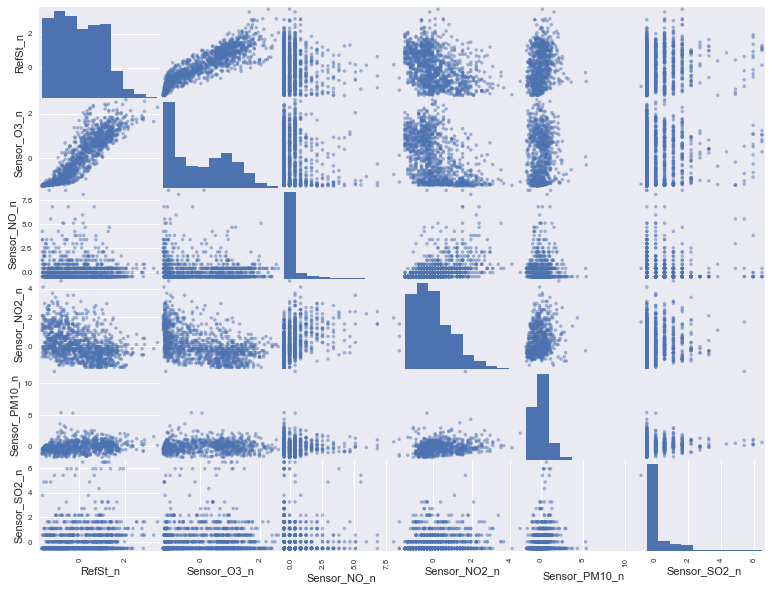

In [10]:
pd.plotting.scatter_matrix(df2,figsize=(13,10))

#  Partie II

## Question 1

In [11]:
df.corr().loc["Sensor_O3_n"].sort_values()

RelHum_n      -0.534079
RelHum        -0.534079
Temp           0.537397
Temp_n         0.537397
RefSt          0.858157
RefSt_n        0.858157
Sensor_O3      1.000000
Sensor_O3_n    1.000000
Name: Sensor_O3_n, dtype: float64

We choose to use RefSt , Temp and RelHum

In [12]:
df2.corr().loc["Sensor_O3_n"].sort_values()

Sensor_NO2_n    -0.471772
Sensor_NO_n     -0.112123
Sensor_PM10_n    0.028256
Sensor_SO2_n     0.065532
RefSt_n          0.900863
Sensor_O3_n      1.000000
Name: Sensor_O3_n, dtype: float64

We choose to use RefSt , Sensor_NO2 for the resampled series

We choose to use RefSt , Temp , RelHum and Sensor_NO2

In [13]:
candidates = {"RefSt":df.RefSt_n.values.reshape((-1,1)),"RefSt - Temp":df[["RefSt_n","Temp_n"]].values,"RefSt - RelHum":df[["RefSt_n","RelHum_n"]].values,"RelHum - Temp":df[["RelHum_n","Temp_n"]].values,"RefSt - Temp - RelHum":df[["RefSt_n","Temp_n","RelHum_n"]].values}
y = df.Sensor_O3_n.values
Summary = pd.DataFrame(columns=["Score","RMSE","MAE"])
Scores = []
MAE = []
RMSE = []


for i in candidates : 
    x=candidates[i]
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    Scores.append(model.score(x,y))
    MAE.append(np.mean(np.abs(y-y_pred)))
    RMSE.append(np.linalg.norm(y-y_pred,2))

Summary["Score"]=Scores
Summary["MAE"]=MAE
Summary["RMSE"]=RMSE
Summary["dRMSE"]=RMSE-min(RMSE)
Summary["dMAE"]=MAE-min(MAE)
index = pd.Index(['RefSt','RefSt - Temp','RefSt - RelHum','RelHum - Temp','RefSt - Temp - RelHum'])
Summary = Summary.set_index(index)
Summary

,Score,RMSE,MAE,dRMSE,dMAE
RefSt,0.736434,36.101708,0.376208,5.666198,0.045078
RefSt - Temp,0.812107,30.481650,0.331130,0.046139,0.000000
RefSt - RelHum,0.751059,35.085797,0.364711,4.650286,0.033581
RelHum - Temp,0.320162,57.981029,0.646089,27.545519,0.314959
RefSt - Temp - RelHum,0.812675,30.435510,0.331847,0.000000,0.000718


the coefficint of RefSt , Temp and RelHum are :  [ 0.03019204 -0.07384095 -0.00285311]
the intercept is :  -0.04711954801000888


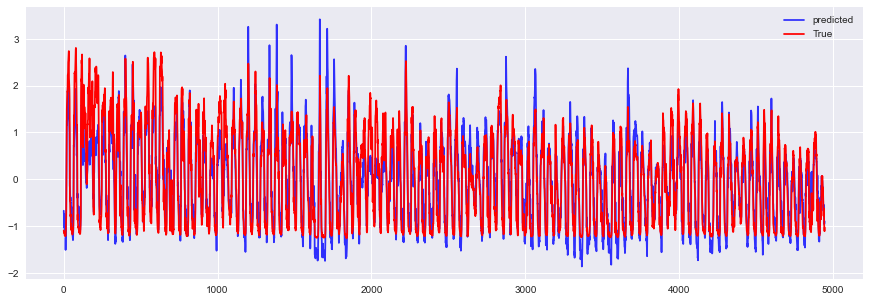

In [17]:
model = LinearRegression()
y = df.Sensor_O3_n.values
x = df[["RefSt","Temp","RelHum"]].values
model.fit(x, y)
y_pred = model.predict(x)
print('the coefficint of RefSt , Temp and RelHum are : ' , model.coef_)
print('the intercept is : ', model.intercept_)
plt.figure(figsize=(15,5))
plt.plot(y_pred,label="predicted",alpha=0.8,color='b')
plt.plot(y,label="True",color='r')
plt.legend()

In [23]:
Temp = df["Temp"].loc['2017-06-17':'2017-08-31'].resample('h').mean()
Temp = Temp.apply(lambda x : (x-Temp.mean())/Temp.std())
df2["Temp_n"] = Temp

## Question 2

In [206]:
def plot_errors(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="test")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()



In [207]:
def evaluate_model(Model, lambdas,X_train,y_train,X_test):
    training_errors = [] # we will store the error on the training set, for using each different lambda
    testing_errors = [] # and the error on the testing set
    for l in lambdas:
        model = Model(alpha=l, max_iter=1000) 
        model.fit(X_train, y_train)
        training_predictions = model.predict(X_train)
        training_mse = mean_squared_error(y_train, training_predictions)
        training_errors.append(training_mse)
        testing_predictions = model.predict(X_test)
        testing_mse = mean_squared_error(y_test, testing_predictions)
        testing_errors.append(testing_mse)
        #print(model.intercept_,model.get_params)
    return training_errors, testing_errors


In [208]:
def evaluate_mae(Model, lambdas,X_train,y_train,X_test):
    training_errors = [] # we will store the error on the training set, for using each different lambda
    testing_errors = [] # and the error on the testing set
    for l in lambdas:
        model = Model(alpha=l, max_iter=1000) 
        model.fit(X_train, y_train)
        training_predictions = model.predict(X_train)
        training_mae = np.mean(np.abs(y_train-training_predictions))
        training_errors.append(training_mae)
        testing_predictions = model.predict(X_test)
        testing_mae = np.mean(np.abs(y_test-testing_predictions))
        testing_errors.append(testing_mae)
        #print(model.intercept_,model.get_params)
    return training_errors, testing_errors




### Lasso

#### Variation of the MSE with lambda

<ipython-input-207-c9035488b672>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/Users/othmanbenmoussa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/othmanbenmoussa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374.1325138246865, tolerance: 0.3953504049010227
  model = cd_fast.enet_coordinate_descent(


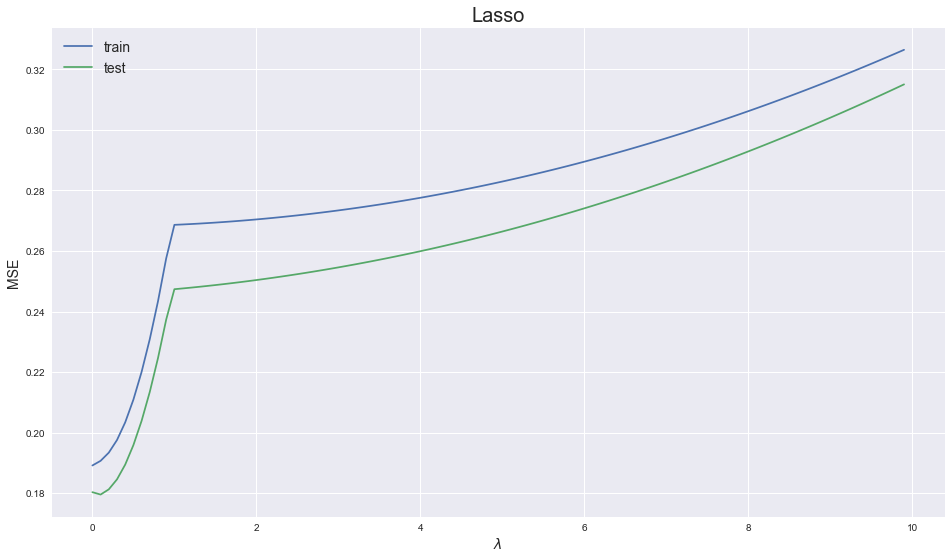

In [209]:
y = df.Sensor_O3_n.values
X = df[["RefSt","Temp","RelHum"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lambdas = np.arange(0, 10, step=0.1)
lasso_train, lasso_test = evaluate_model(Lasso, lambdas,X_train,y_train,X_test)
plt.figure(figsize=(16, 9))
plt.plot(lambdas, lasso_train, label="train")
plt.plot(lambdas, lasso_test, label="test")
plt.xlabel("$\\lambda$", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.title("Lasso", fontsize=20)
plt.legend(fontsize=14)
plt.show()

#### MAE

<ipython-input-28-533dea255ec4>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/Users/othmanbenmoussa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/othmanbenmoussa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371.7190599846773, tolerance: 0.39914523375500627
  model = cd_fast.enet_coordinate_descent(


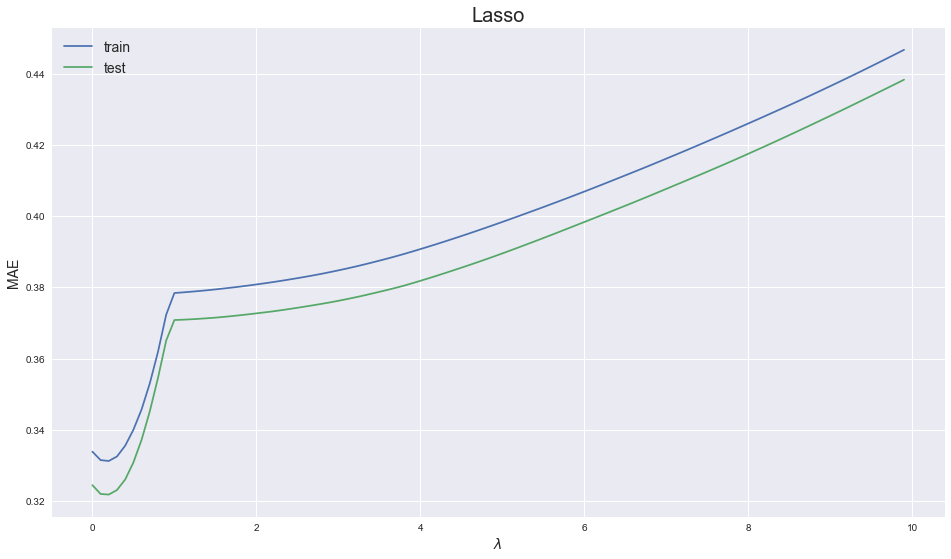

In [204]:
y = df.Sensor_O3_n.values
X = df[["RefSt","Temp","RelHum"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lambdas = np.arange(0, 10, step=0.1)
lasso_train, lasso_test = evaluate_mae(Lasso, lambdas,X_train,y_train,X_test)
plt.figure(figsize=(16, 9))
plt.plot(lambdas, lasso_train, label="train")
plt.plot(lambdas, lasso_test, label="test")
plt.xlabel("$\\lambda$", fontsize=14)
plt.ylabel("MAE", fontsize=14)
plt.title("Lasso", fontsize=20)
plt.legend(fontsize=14)
plt.show()

## Ridge

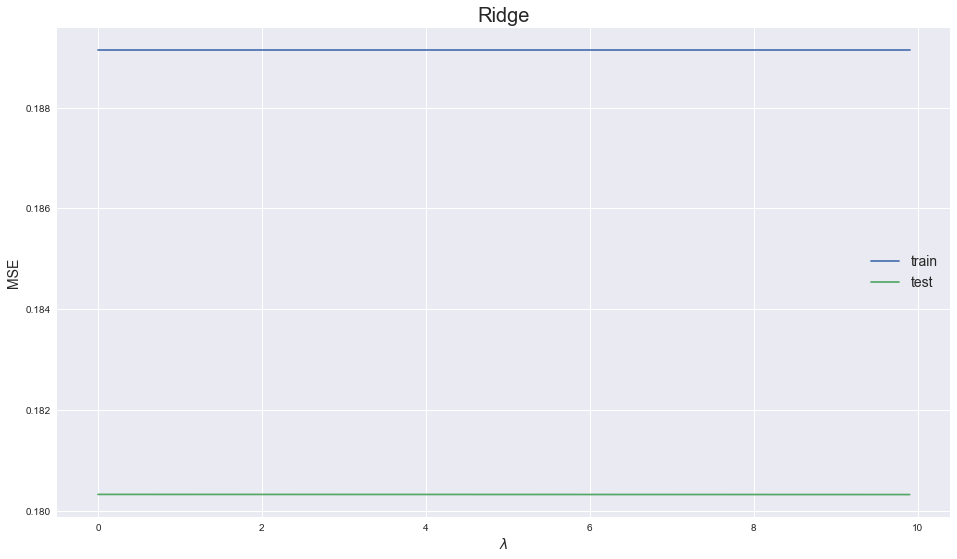

In [210]:
ridge_train, ridge_test = evaluate_model(Ridge, lambdas,X_train,y_train,X_test)
plt.figure(figsize=(16, 9))
plt.plot(lambdas, ridge_train, label="train")
plt.plot(lambdas, ridge_test, label="test")
plt.xlabel("$\\lambda$", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.title("Ridge", fontsize=20)
plt.legend(fontsize=14)
plt.show()

We need to zoom the plots

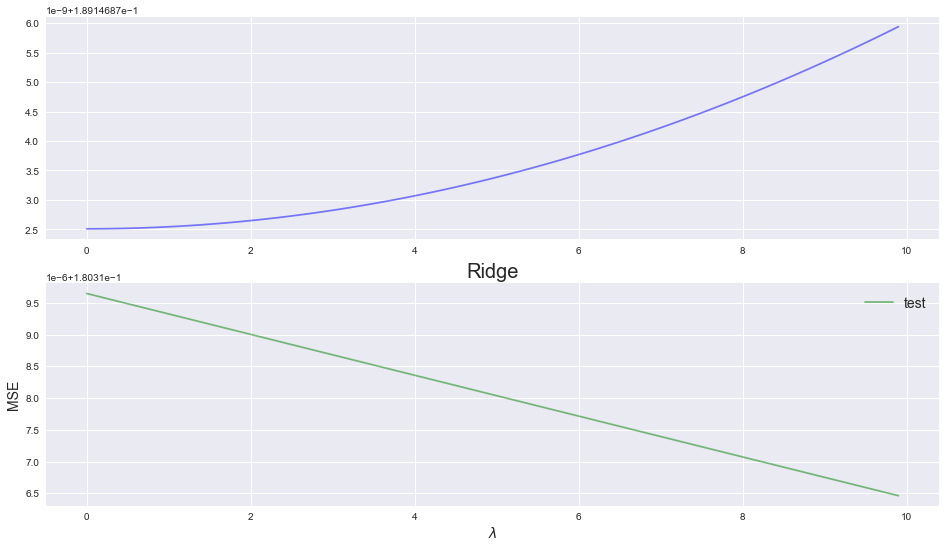

In [211]:
fig, axs = plt.subplots(2,figsize=(16, 9))
axs[0].plot(lambdas, ridge_train, label="train",color='b',alpha=0.5)
axs[1].plot(lambdas, ridge_test, label="test",color='g',alpha=0.5)
plt.xlabel("$\\lambda$", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.title("Ridge", fontsize=20)
plt.legend(fontsize=14)
plt.show()

#### Evaluating MAE

<ipython-input-28-533dea255ec4>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/Users/othmanbenmoussa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/othmanbenmoussa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363.82595973202933, tolerance: 0.3967587048619381
  model = cd_fast.enet_coordinate_descent(


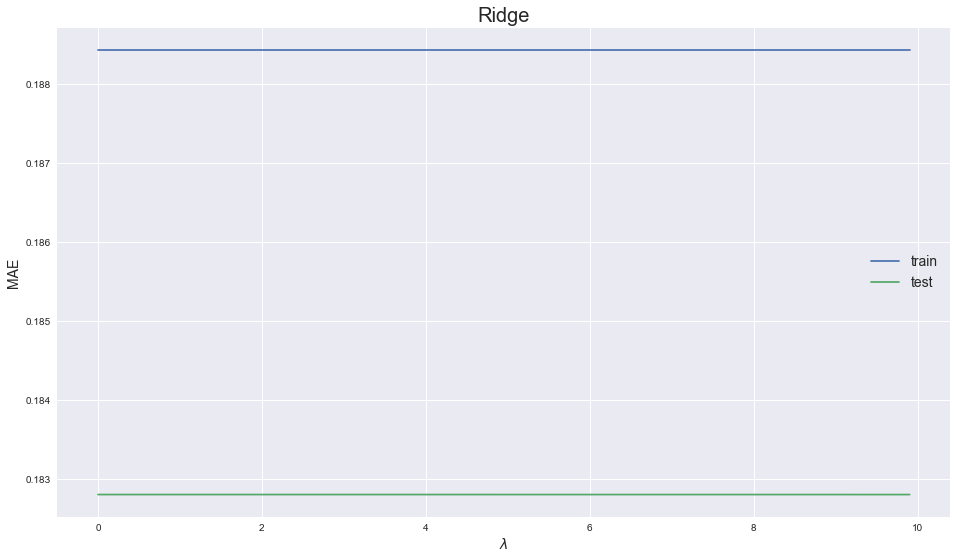

In [32]:
y = df.Sensor_O3_n.values
X = df[["RefSt","Temp","RelHum"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lambdas = np.arange(0, 10, step=0.1)
lasso_train, lasso_test = evaluate_mae(Lasso, lambdas,X_train,y_train,X_test)
plt.figure(figsize=(16, 9))
plt.plot(lambdas, ridge_train, label="train")
plt.plot(lambdas, ridge_test, label="test")
plt.xlabel("$\\lambda$", fontsize=14)
plt.ylabel("MAE", fontsize=14)
plt.title("Ridge", fontsize=20)
plt.legend(fontsize=14)
plt.show()

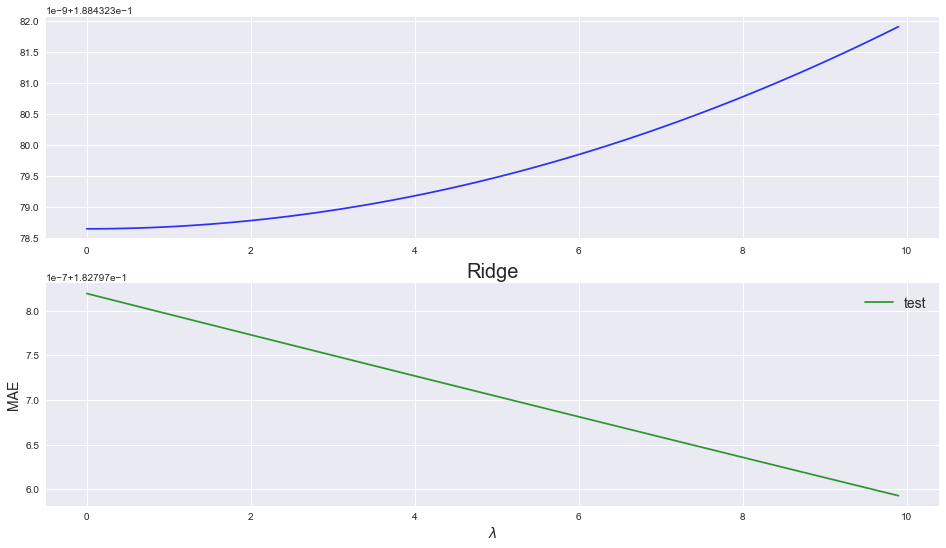

In [33]:
fig, axs = plt.subplots(2,figsize=(16, 9))
axs[0].plot(lambdas, ridge_train, label="train",color='b',alpha=0.8)
axs[1].plot(lambdas, ridge_test, label="test",color='g',alpha=0.8)
plt.xlabel("$\\lambda$", fontsize=14)
plt.ylabel("MAE", fontsize=14)
plt.title("Ridge", fontsize=20)
plt.legend(fontsize=14)
plt.show()

R^2

In [79]:
def score_mod(Model, lambdas,X_train,y_train,X_test):
    scores_train=[]
    scores_test=[]
    for l in lambdas:
        model = Model(alpha=l, max_iter=1000)
        model.fit(X_train, y_train)
        score_train= model.score(X_train, y_train)
        scores_train.append(score_train)
        y_predicted=model.predict(X_test)
        score_test=model.score(X_test, y_predicted)
        scores_test.append(score_test)
    return scores_train,scores_test


In [ ]:
def evaluate_mod(Model, lambdas,X_train,y_train,X_test):
    parameters={}
    for l in lambdas:
        model = Model(alpha=l, max_iter=1000)
        model.fit(X_train, y_train)
        score= model.score(X_train, y_train)
        parameters[l]=score
    return(parameters)

<ipython-input-79-fa726756882d>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/Users/othmanbenmoussa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/othmanbenmoussa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361.75157168380855, tolerance: 0.3916872052100865
  model = cd_fast.enet_coordinate_descent(
No handles with labels found to put in legend.


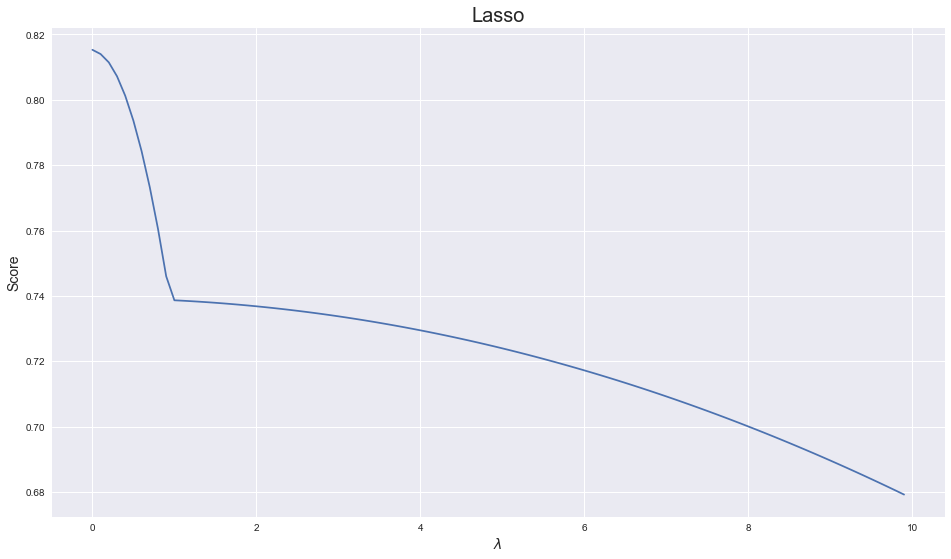

In [213]:
y = df.Sensor_O3_n.values
X = df[["RefSt","Temp","RelHum"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lambdas = np.arange(0, 10, step=0.1)
lasso_train, lasso_test = score_mod(Lasso, lambdas,X_train,y_train,X_test)
plt.figure(figsize=(16, 9))
plt.plot(lambdas, lasso_train)
plt.xlabel("$\\lambda$", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.title("Lasso", fontsize=20)
plt.legend(fontsize=14)
plt.show()

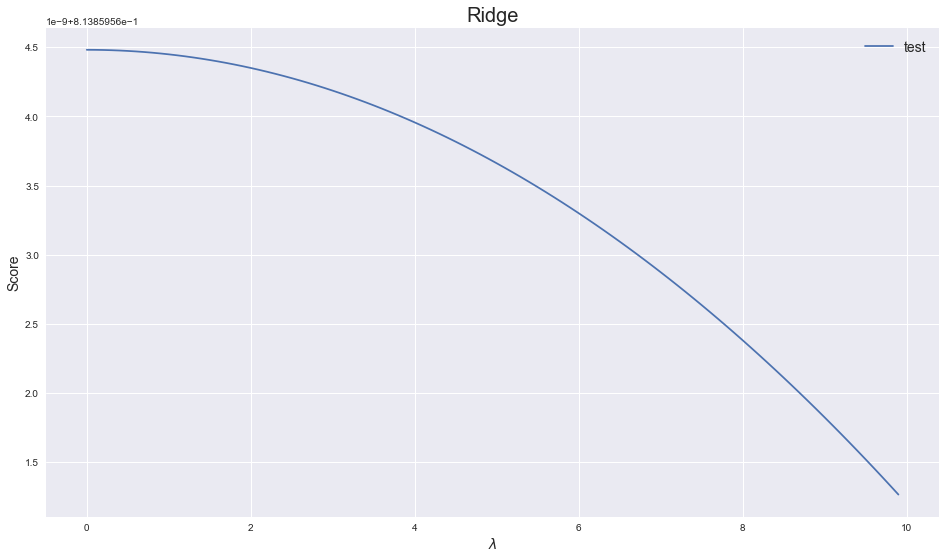

In [222]:
y = df.Sensor_O3_n.values
X = df[["RefSt","Temp","RelHum"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lambdas = np.arange(0, 10, step=0.1)
ridge_train, ridge_test = score_mod(Ridge, lambdas,X_train,y_train,X_test)
plt.figure(figsize=(16, 9))
plt.plot(lambdas, ridge_train, label="test")
plt.xlabel("$\\lambda$", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.title("Ridge", fontsize=20)
plt.legend(fontsize=14)
plt.show()

No handles with labels found to put in legend.


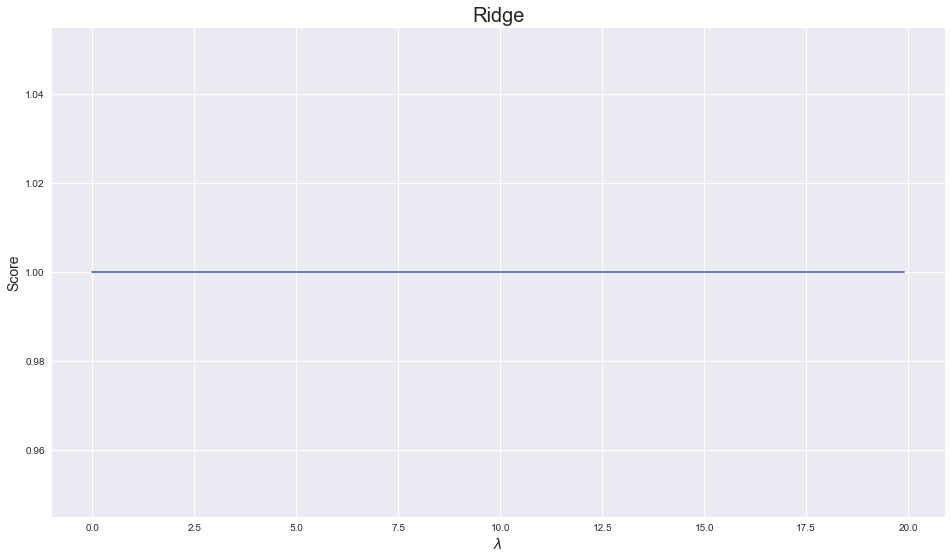

In [215]:
y = df.Sensor_O3_n.values
X = df[["RefSt","Temp","RelHum"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lambdas = np.arange(0, 20, step=0.1)
ridge_train, ridge_test = score_mod(Ridge, lambdas,X_train,y_train,X_test)
plt.figure(figsize=(16, 9))
plt.plot(lambdas, ridge_test)
plt.xlabel("$\\lambda$", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.title("Ridge", fontsize=20)
plt.legend(fontsize=14)
plt.show()

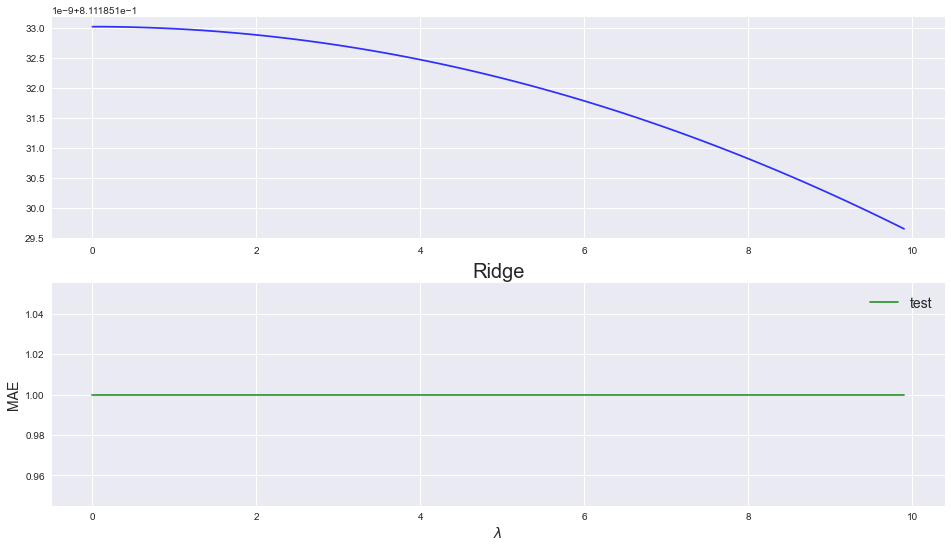

In [219]:
fig, axs = plt.subplots(2,figsize=(16, 9))
axs[0].plot(lambdas, ridge_train, label="train",color='b',alpha=0.8)
axs[1].plot(lambdas, ridge_test, label="test",color='g',alpha=0.8)
plt.xlabel("$\\lambda$", fontsize=14)
plt.ylabel("MAE", fontsize=14)
plt.title("Ridge", fontsize=20)
plt.legend(fontsize=14)
plt.show()

In [89]:
def coeff_mod(Model, lambdas,X_train,y_train,X_test):
    coefficients={}
    for l in lambdas:
        model = Model(alpha=l, max_iter=1000)
        model.fit(X_train, y_train)
        coeff= model.coef_
        coefficients[l]=coeff
    return(coefficients)

In [91]:
y = df.Sensor_O3_n.values
X = df[["RefSt","Temp","RelHum"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lambdas = np.arange(0, 10, step=1)
coeff_mod(Ridge, lambdas,X_train,y_train,X_test)

{0: array([ 0.03022633, -0.07490285, -0.00348713]),
 1: array([ 0.03022618, -0.07490111, -0.00348677]),
 2: array([ 0.03022603, -0.07489937, -0.00348642]),
 3: array([ 0.03022588, -0.07489763, -0.00348607]),
 4: array([ 0.03022573, -0.07489589, -0.00348572]),
 5: array([ 0.03022558, -0.07489414, -0.00348537]),
 6: array([ 0.03022542, -0.0748924 , -0.00348502]),
 7: array([ 0.03022527, -0.07489066, -0.00348467]),
 8: array([ 0.03022512, -0.07488892, -0.00348431]),
 9: array([ 0.03022497, -0.07488718, -0.00348396])}

In [92]:
y = df.Sensor_O3_n.values
X = df[["RefSt","Temp","RelHum"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lambdas = np.arange(0, 10, step=1)
coeff_mod(Lasso, lambdas,X_train,y_train,X_test)

<ipython-input-89-6073d0f477dd>:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/Users/othmanbenmoussa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/othmanbenmoussa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 373.3765160486325, tolerance: 0.3955066383221572
  model = cd_fast.enet_coordinate_descent(


{0: array([ 0.03015964, -0.07551352, -0.00358815]),
 1: array([ 0.02034237, -0.        ,  0.        ]),
 2: array([ 0.01974388, -0.        ,  0.        ]),
 3: array([ 0.01914539, -0.        ,  0.        ]),
 4: array([ 0.01854689, -0.        ,  0.        ]),
 5: array([ 0.0179484, -0.       , -0.       ]),
 6: array([ 0.01734991, -0.        , -0.        ]),
 7: array([ 0.01675141, -0.        , -0.        ]),
 8: array([ 0.01615292, -0.        , -0.        ]),
 9: array([ 0.01555443,  0.        , -0.        ])}

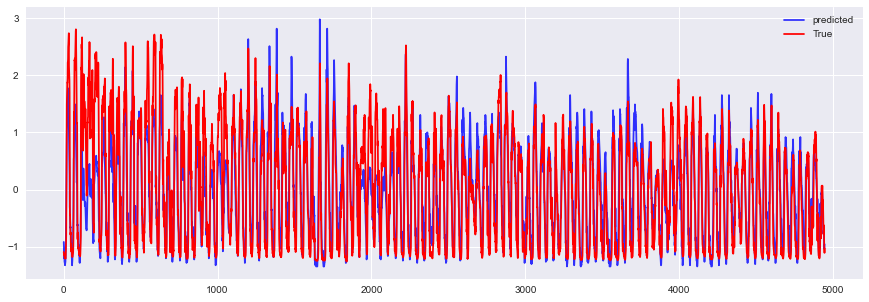

In [114]:
y = df.Sensor_O3_n.values
x = df[["RefSt","Temp","RelHum"]].values
model = Lasso(alpha=1, max_iter=1000)
model.fit(x, y)
y_pred = model.predict(x)
plt.figure(figsize=(15,5))
plt.plot(y_pred,label="predicted",alpha=0.8,color='b')
plt.plot(y,label="True",color='r')
plt.legend()

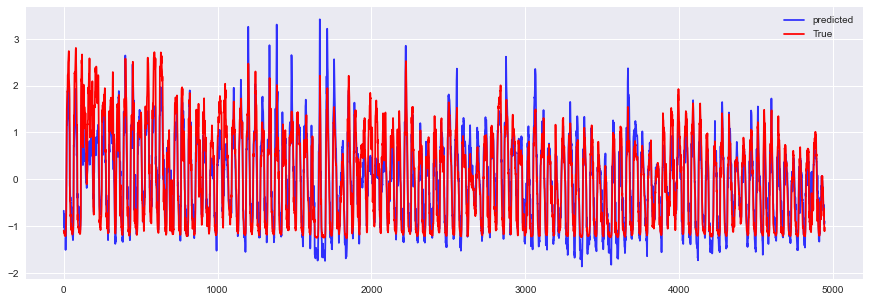

In [115]:
y = df.Sensor_O3_n.values
x = df[["RefSt","Temp","RelHum"]].values
model = Ridge(alpha=1, max_iter=1000)
model.fit(x, y)
y_pred = model.predict(x)
plt.figure(figsize=(15,5))
plt.plot(y_pred,label="predicted",alpha=0.8,color='b')
plt.plot(y,label="True",color='r')
plt.legend()

# KNN regression

Text(0.5, 1.0, 'ELBOW PLOT')

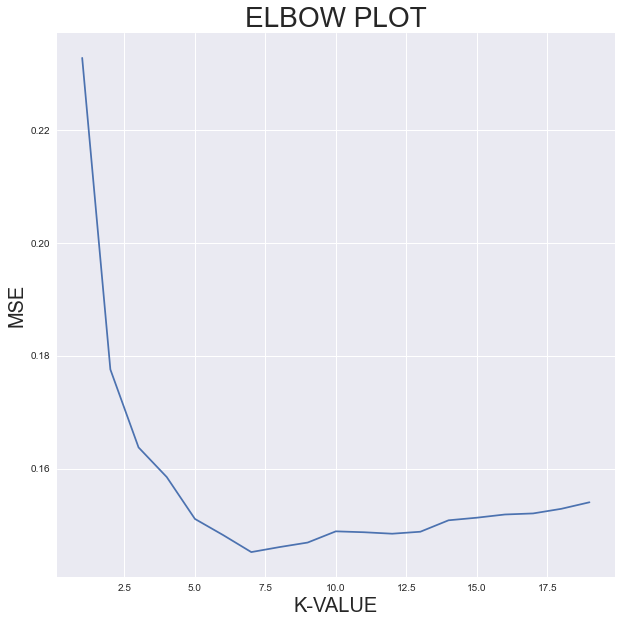

In [99]:
fig,ax=plt.subplots(figsize=(10,10))
y = df.Sensor_O3_n.values
X = df[["RefSt","Temp","RelHum"]].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
k_list=np.arange(1,20,1)
knn_dict={} # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(x_train,y_train)
    y_knn_pred=model_knn.predict(x_test)
#Storing MSE 
    mse=mean_squared_error(y_test,y_knn_pred)
    knn_dict[i]=mse
#Plotting the results
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE' ,fontsize=20)
ax.set_title('ELBOW PLOT' ,fontsize=28)

We choose a value of 8 for k

In [179]:
candidates = {"RefSt":df.RefSt_n.values.reshape((-1,1)),"RefSt - Temp":df[["RefSt_n","Temp_n"]].values,"RefSt - RelHum":df[["RefSt_n","RelHum_n"]].values,"RelHum - Temp":df[["RelHum_n","Temp_n"]].values,"RefSt - Temp - RelHum":df[["RefSt_n","Temp_n","RelHum_n"]].values}
y = df.Sensor_O3_n.values
Summary = pd.DataFrame(columns=["Score","RMSE","MAE"])
Scores = []
MAE = []
RMSE = []


for i in candidates : 
    x=candidates[i]
    model = KNeighborsRegressor(n_neighbors=7)
    model.fit(x, y)
    y_pred = model.predict(x)
    Scores.append(model.score(x,y))
    MAE.append(np.mean(np.abs(y-y_pred)))
    RMSE.append(np.linalg.norm(y-y_pred,2))

Summary["Score"]=Scores
Summary["MAE"]=MAE
Summary["RMSE"]=RMSE
Summary["dRMSE"]=RMSE-min(RMSE)
Summary["dMAE"]=MAE-min(MAE)
index = pd.Index(['RefSt','RefSt - Temp','RefSt - RelHum','RelHum - Temp','RefSt - Temp - RelHum'])
Summary = Summary.set_index(index)
Summary

,Score,RMSE,MAE,dRMSE,dMAE
RefSt,0.743757,35.596686,0.354881,13.375974,0.132764
RefSt - Temp,0.892658,23.039187,0.230078,0.818475,0.007960
RefSt - RelHum,0.860422,26.271881,0.262933,4.051169,0.040816
RelHum - Temp,0.451693,52.070875,0.564129,29.850162,0.342012
RefSt - Temp - RelHum,0.900150,22.220712,0.222117,0.000000,0.000000


In [107]:
y = df.Sensor_O3_n.values
X = df[["RefSt","Temp","RelHum"]].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
k_list=np.arange(1,20,1)
# Instance and fit
knn_model = KNeighborsRegressor(n_neighbors=7).fit(x_train, y_train)
# Score
score_knn = knn_model.score(x_test, y_test)
score_knn

0.8578878155104457

We get a good accuracy

In [108]:
def evaluate_mae_knn(X_train,Y_train,X_test):
    training_errors = [] # we will store the error on the training set, for using each different lambda
    testing_errors = [] # and the error on the testing set
    model =KNeighborsRegressor(n_neighbors=7).fit(X_train, Y_train)
    training_predictions = model.predict(X_train)
    training_mae = np.mean(np.abs(y_train-training_predictions))
    training_errors.append(training_mae)
    testing_predictions = model.predict(X_test)
    testing_mae = np.mean(np.abs(y_test-testing_predictions))
    testing_errors.append(testing_mae)
    #print(model.intercept_,model.get_params)
    return training_errors, testing_errors

In [110]:
y = df.Sensor_O3_n.values
X = df[["RefSt","Temp","RelHum"]].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
evaluate_mae_knn(x_train,y_train,x_test)

([0.22861141741031527], [0.26586747217168905])

Our MAE is :
    - training 0.22
    -test 0.26

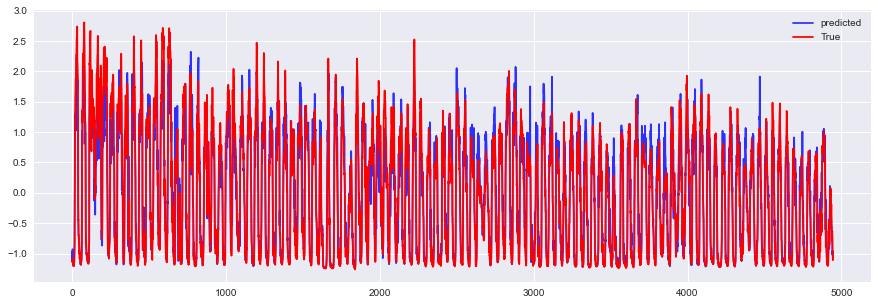

In [113]:
y = df.Sensor_O3_n.values
x = df[["RefSt","Temp","RelHum"]].values
model = KNeighborsRegressor(n_neighbors=7)
model.fit(x, y)
y_pred = model.predict(x)
plt.figure(figsize=(15,5))
plt.plot(y_pred,label="predicted",alpha=0.8,color='b')
plt.plot(y,label="True",color='r')
plt.legend()

## Kernel ridge regression

In [135]:
n_samples, n_features = 10, 5
range = np.random.RandomState(0)
y = df.Sensor_O3_n.values
x = df[["RefSt","Temp","RelHum"]].values
kernel = KernelRidge(kernel="rbf", alpha=1e-3, gamma=0.05)
kernel.fit(X, y)

KernelRidge(alpha=0.001, gamma=0.05, kernel='rbf')

In [180]:
candidates = {"RefSt":df.RefSt_n.values.reshape((-1,1)),"RefSt - Temp":df[["RefSt_n","Temp_n"]].values,"RefSt - RelHum":df[["RefSt_n","RelHum_n"]].values,"RelHum - Temp":df[["RelHum_n","Temp_n"]].values,"RefSt - Temp - RelHum":df[["RefSt_n","Temp_n","RelHum_n"]].values}
y = df.Sensor_O3_n.values
Summary = pd.DataFrame(columns=["Score","RMSE","MAE"])
Scores = []
MAE = []
RMSE = []


for i in candidates : 
    x=candidates[i]
    model = KernelRidge(kernel="rbf", alpha=1e-3, gamma=0.05)
    model.fit(x, y)
    y_pred = model.predict(x)
    Scores.append(model.score(x,y))
    MAE.append(np.mean(np.abs(y-y_pred)))
    RMSE.append(np.linalg.norm(y-y_pred,2))

Summary["Score"]=Scores
Summary["MAE"]=MAE
Summary["RMSE"]=RMSE
Summary["dRMSE"]=RMSE-min(RMSE)
Summary["dMAE"]=MAE-min(MAE)
index = pd.Index(['RefSt','RefSt - Temp','RefSt - RelHum','RelHum - Temp','RefSt - Temp - RelHum'])
Summary = Summary.set_index(index)
Summary

,Score,RMSE,MAE,dRMSE,dMAE
RefSt,0.757747,34.611293,0.350192,9.369852,0.096176
RefSt - Temp,0.864485,25.886681,0.261496,0.645240,0.007480
RefSt - RelHum,0.809513,30.691354,0.313230,5.449913,0.059214
RelHum - Temp,0.355937,56.434862,0.623263,31.193421,0.369247
RefSt - Temp - RelHum,0.871157,25.241441,0.254016,0.000000,0.000000


In [167]:
def evaluate_model(X_train,y_train,X_test,alphas):
    training_errors = [] # we will store the error on the training set, for using each different lambda
    testing_errors = [] # and the error on the testing set
    for alpha in alphas:
        model=KernelRidge(alpha,kernel="rbf", gamma=0.05)
        model.fit(X_train, y_train)
        training_predictions = model.predict(X_train)
        training_mse = mean_squared_error(y_train, training_predictions)
        training_errors.append(training_mse)
        testing_predictions = model.predict(X_test)
        testing_mse = mean_squared_error(y_test, testing_predictions)
        testing_errors.append(testing_mse)
        #print(model.intercept_,model.get_params)
    return training_errors, testing_errors



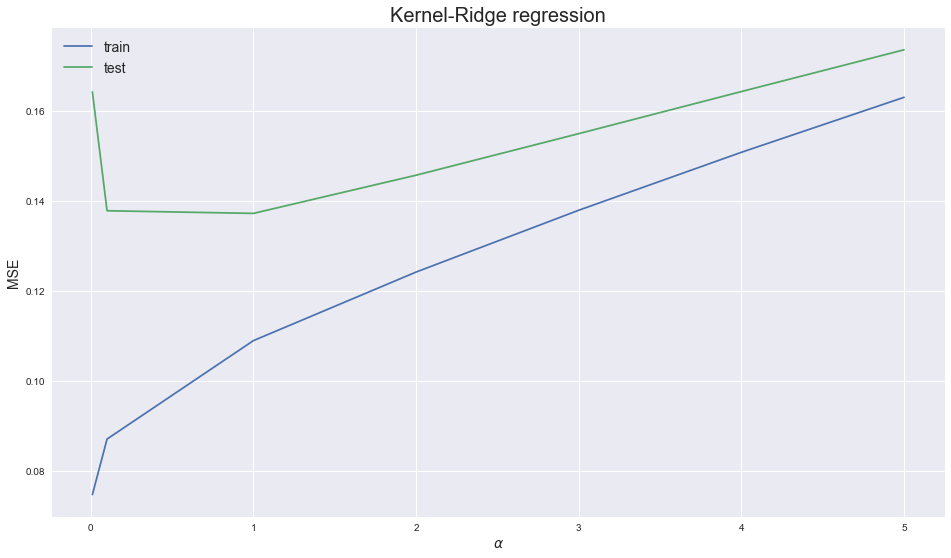

In [174]:
y = df.Sensor_O3_n.values
X = df[["RefSt","Temp","RelHum"]].values
alphas=[0.01,0.1,1,2,3,4,5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
kernel_train, kernel_test = evaluate_model(X_train,y_train,X_test,alphas)
plt.figure(figsize=(16, 9))
plt.plot(alphas, kernel_train, label="train")
plt.plot(alphas, kernel_test, label="test")
plt.xlabel("$\\alpha$", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.title("Kernel-Ridge regression", fontsize=20)
plt.legend(fontsize=14)
plt.show()

In [157]:
model=KernelRidge(0.01,kernel="rbf", gamma=0.05)
model.fit(X_train, y_train)

KernelRidge(alpha=0.01, gamma=0.05, kernel='rbf')

In [160]:
model.score(X_train, y_train, sample_weight=None)

0.9251796134409584

In [161]:
model.get_params(deep=True)

{'alpha': 0.01,
 'coef0': 1,
 'degree': 3,
 'gamma': 0.05,
 'kernel': 'rbf',
 'kernel_params': None}

the degree of the polynom is 3

In [165]:
def evaluate_mae_1(X_train,y_train,X_test,alphas):
    training_errors = [] # we will store the error on the training set, for using each different lambda
    testing_errors = [] # and the error on the testing set
    for alpha in alphas:
        model=KernelRidge(alpha,kernel="rbf", gamma=0.05)
        model.fit(X_train, y_train)
        training_predictions = model.predict(X_train)
        training_mae = np.mean(np.abs(y_train-training_predictions))
        training_errors.append(training_mae)
        testing_predictions = model.predict(X_test)
        testing_mae = np.mean(np.abs(y_test-testing_predictions))
        testing_errors.append(testing_mae)
        #print(model.intercept_,model.get_params)
    return training_errors, testing_errors









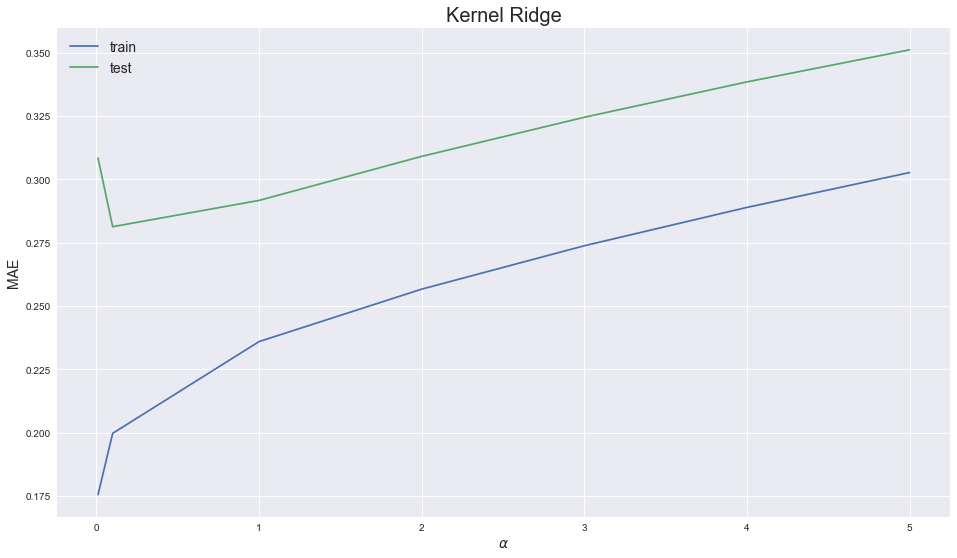

In [177]:
y = df.Sensor_O3_n.values
X = df[["RefSt","Temp","RelHum"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
alphas=[0.01,0.1,1,2,3,4,5]
kernel_train, kernel_test = evaluate_mae_1(X_train,y_train,X_test,alphas)
plt.figure(figsize=(16, 9))
plt.plot(alphas, kernel_train, label="train")
plt.plot(alphas, kernel_test, label="test")
plt.xlabel("$\\alpha$", fontsize=14)
plt.ylabel("MAE", fontsize=14)
plt.title("Kernel Ridge", fontsize=20)
plt.legend(fontsize=14)
plt.show()

In [166]:
y = df.Sensor_O3_n.values
X = df[["RefSt","Temp","RelHum"]].values
alphas=[0,0.1,0.01,0.001,0.0001 ]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
evaluate_mae_1(X_train,y_train,X_test,alphas)

/Users/othmanbenmoussa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


([0.014785169116352177,
  0.20046185024486096,
  0.1767456063372154,
  0.15496667594405775,
  0.13526250824757677],
 [2059.0212347908,
  0.27261406539603206,
  0.3005711097409715,
  0.37294893559052883,
  0.5265433491172582])

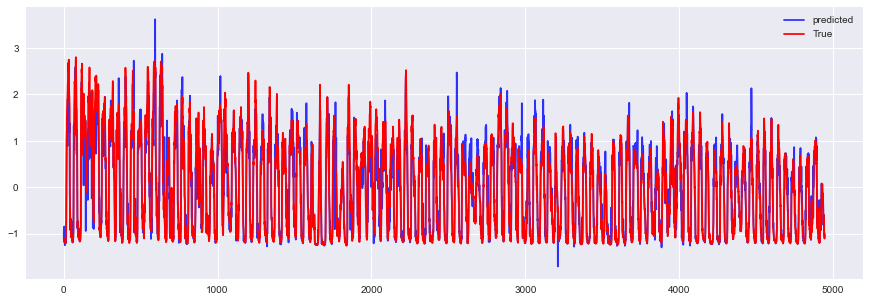

In [162]:
y = df.Sensor_O3_n.values
x = df[["RefSt","Temp","RelHum"]].values
y_pred = model.predict(x)
plt.figure(figsize=(15,5))
plt.plot(y_pred,label="predicted",alpha=0.8,color='b')
plt.plot(y,label="True",color='r')
plt.legend()

# Random forest

In [185]:
candidates = {"RefSt":df.RefSt_n.values.reshape((-1,1)),"RefSt - Temp":df[["RefSt_n","Temp_n"]].values,"RefSt - RelHum":df[["RefSt_n","RelHum_n"]].values,"RelHum - Temp":df[["RelHum_n","Temp_n"]].values,"RefSt - Temp - RelHum":df[["RefSt_n","Temp_n","RelHum_n"]].values}
y = df.Sensor_O3_n.values
Summary = pd.DataFrame(columns=["Score","RMSE","MAE"])
Scores = []
MAE = []
RMSE = []


for i in candidates : 
    x=candidates[i]
    model = RandomForestRegressor()
    model.fit(x, y)
    y_pred = model.predict(x)
    Scores.append(model.score(x,y))
    MAE.append(np.mean(np.abs(y-y_pred)))
    RMSE.append(np.linalg.norm(y-y_pred,2))

Summary["Score"]=Scores
Summary["MAE"]=MAE
Summary["RMSE"]=RMSE
Summary["dRMSE"]=RMSE-min(RMSE)
Summary["dMAE"]=MAE-min(MAE)
index = pd.Index(['RefSt','RefSt - Temp','RefSt - RelHum','RelHum - Temp','RefSt - Temp - RelHum'])
Summary = Summary.set_index(index)
Summary

,Score,RMSE,MAE,dRMSE,dMAE
RefSt,0.770729,33.671104,0.338766,23.741445,0.241592
RefSt - Temp,0.971153,11.943462,0.115447,2.013802,0.018273
RefSt - RelHum,0.963446,13.444595,0.128717,3.514936,0.031543
RelHum - Temp,0.807469,30.855542,0.308886,20.925883,0.211711
RefSt - Temp - RelHum,0.980061,9.929659,0.097174,0.000000,0.000000


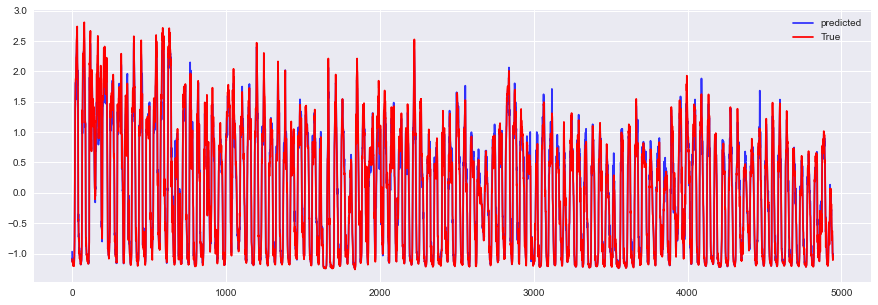

In [191]:
x=df[["RefSt_n","Temp_n","RelHum_n"]].values
y=df.Sensor_O3_n.values
model = RandomForestRegressor()
model.fit(x,y)
y_pred = model.predict(x)
plt.figure(figsize=(15,5))
plt.plot(y_pred,label="predicted",alpha=0.8,color='b')
plt.plot(y,label="True",color='r')
plt.legend()

In [193]:
model.score(x, y, sample_weight=None)

0.9800851680410809

## Support vector regression

In [195]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [196]:
candidates = {"RefSt":df.RefSt_n.values.reshape((-1,1)),"RefSt - Temp":df[["RefSt_n","Temp_n"]].values,"RefSt - RelHum":df[["RefSt_n","RelHum_n"]].values,"RelHum - Temp":df[["RelHum_n","Temp_n"]].values,"RefSt - Temp - RelHum":df[["RefSt_n","Temp_n","RelHum_n"]].values}
y = df.Sensor_O3_n.values
Summary = pd.DataFrame(columns=["Score","RMSE","MAE"])
Scores = []
MAE = []
RMSE = []


for i in candidates : 
    x=candidates[i]
    model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
    model.fit(x, y)
    y_pred = model.predict(x)
    Scores.append(model.score(x,y))
    MAE.append(np.mean(np.abs(y-y_pred)))
    RMSE.append(np.linalg.norm(y-y_pred,2))

Summary["Score"]=Scores
Summary["MAE"]=MAE
Summary["RMSE"]=RMSE
Summary["dRMSE"]=RMSE-min(RMSE)
Summary["dMAE"]=MAE-min(MAE)
index = pd.Index(['RefSt','RefSt - Temp','RefSt - RelHum','RelHum - Temp','RefSt - Temp - RelHum'])
Summary = Summary.set_index(index)
Summary

,Score,RMSE,MAE,dRMSE,dMAE
RefSt,0.756051,34.732232,0.354584,9.472048,0.099680
RefSt - Temp,0.865246,25.813892,0.267148,0.553707,0.012244
RefSt - RelHum,0.812538,30.446671,0.312278,5.186487,0.057374
RelHum - Temp,0.321299,57.932513,0.594452,32.672328,0.339548
RefSt - Temp - RelHum,0.870965,25.260184,0.254904,0.000000,0.000000


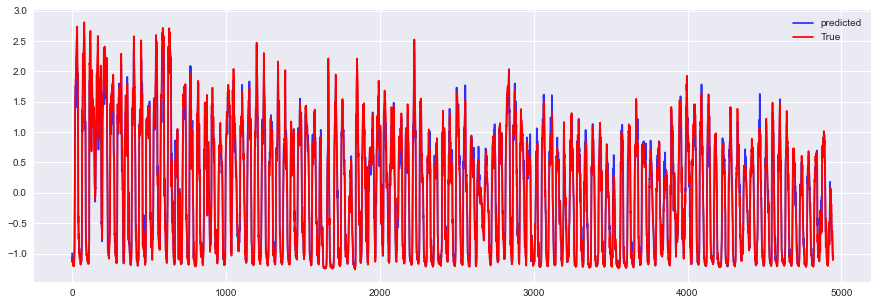

In [197]:
x=df[["RefSt_n","Temp_n","RelHum_n"]].values
y=df.Sensor_O3_n.values
model = RandomForestRegressor()
model.fit(x,y)
y_pred = model.predict(x)
plt.figure(figsize=(15,5))
plt.plot(y_pred,label="predicted",alpha=0.8,color='b')
plt.plot(y,label="True",color='r')
plt.legend()

In [224]:
Summary = pd.DataFrame(columns=["MLR","Ridge","Lasso","KNN","Kernel","RF","SVR"])



Summary["MLR"]=[0.81,0.33,30]
Summary["Ridge"]=[0.81,0.18,0.18]
Summary["Lasso"]=[0.74,0.37,0.25]
Summary["KNN"]=[0.9,0.22,22]
Summary["Kernel"]=[0.87,0.25,25]
Summary["RF"]=[0.98,0.09,10]
Summary["SVR"]=[0.87,0.25,25]
index = pd.Index(['Score','MAE','MSE'])
Summary = Summary.set_index(index)
Summary

,MLR,Ridge,Lasso,KNN,Kernel,RF,SVR
Score,0.81,0.81,0.74,0.90,0.87,0.98,0.87
MAE,0.33,0.18,0.37,0.22,0.25,0.09,0.25
MSE,30.00,0.18,0.25,22.00,25.00,10.00,25.00
